In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats
from sklearn import datasets
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib
import os

# Import API key
from bz_sql_key import pgAdmin


In [2]:
#-- ## Bonus (Optional)
#-- 1. Import the SQL database into Pandas. (Yes, I could read the CSVs directly in Pandas, but after all, 
#      trying to prove my technical mettle.) 

import psycopg2 
# BZ had to first do "pip install psycopg2" in my Bash base directoy

from sqlalchemy import create_engine
engine = create_engine(pgAdmin)
connection = engine.connect()

titles_data = engine.execute("SELECT * FROM titles")
# print(titles_data)           
title_id = []
title = []
c = 0
for record in titles_data:
    c = c + 1
    title_id.append(record[0])
    title.append(record[1])
# print(f"{c} rows returned")
title_df=pd.DataFrame({"Title_ID": title_id, "Title": title})
print(title_df)



# print("*******************************************************************")
# print("Need to remove  employees limit 100")
# print("*******************************************************************")
employees_data = engine.execute("SELECT * FROM employees")
print(employees_data)                      
emp_no = []
emp_title_id  = []
c = 0
for record in employees_data:
    c = c + 1
    emp_no.append(record[0])
    emp_title_id.append(record[1])
print(f"{c} rows returned")
employees_df=pd.DataFrame({"Emp_No": emp_no, "Emp_Title_ID": emp_title_id})
print(employees_df)



salaries_data = engine.execute("SELECT * FROM salaries")
print(salaries_data)                      
emp_no = []
salary = []
c = 0
for record in salaries_data:
    c = c + 1
    emp_no.append(record[0])
    salary.append(record[1])
print(f"{c} rows returned")
# print(f"Salary {salary}")

salaries_df = pd.DataFrame({"Emp_No": emp_no, "Salary": salary})
print(f"salaries_df {salaries_df}")


  Title_ID               Title
0    s0001               Staff
1    s0002        Senior Staff
2    e0001  Assistant Engineer
3    e0002            Engineer
4    e0003     Senior Engineer
5    e0004    Technique Leader
6    m0001             Manager
300024 rows returned
        Emp_No Emp_Title_ID
0       473302        s0001
1       475053        e0002
2        57444        e0002
3       421786        s0001
4       282238        e0003
...        ...          ...
300019  464231        s0001
300020  255832        e0002
300021   76671        s0001
300022  264920        s0001
300023  464503        s0002

[300024 rows x 2 columns]
300024 rows returned
salaries_df         Emp_No  Salary
0        10001   60117
1        10002   65828
2        10003   40006
3        10004   40054
4        10005   78228
...        ...     ...
300019  499995   40000
300020  499996   58058
300021  499997   49597
300022  499998   40000
300023  499999   63707

[300024 rows x 2 columns]


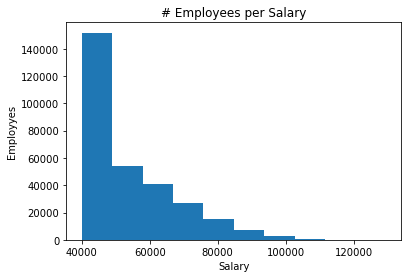

In [3]:
#-- 2. Create a histogram to visualize the most common salary ranges for employees.

# print(salary)
plt.hist(salary)

plt.xlabel("Salary")
plt.ylabel("Employyes")
plt.title("# Employees per Salary")

plt.show()

In [ ]:
#-- 3. Create a bar chart of average salary by title.

# print()
# print("******************************************************************************************")
# print("Please note this section is still work in progress and should be finished Monday night EST")
# print("******************************************************************************************")
# print()

# From #2 above: title_df=pd.DataFrame({"Title_ID": title_id, "Title": title})
print(title_df)
print()


# From #2 above: employees_df=pd.DataFrame({"Emp_No": emp_no, "Emp_Title_ID": emp_title_id})
print(employees_df)
print()


# From #2 above: salaries_df = pd.DataFrame({"Emp_No": emp_no, "Salary": salary})
print("salaries_df")
print(salaries_df)
print(salaries_df[0:2])
print()

# Merge the two DataFrames together based on the Dates they share
# crypto_df = pd.merge(bitcoin_df, dash_df, on="Date")
# crypto_df.head()
sal_emp_merge_df = pd.merge(salaries_df, employees_df, on="Emp_No")
print("sal_emp_merge_df")
print(sal_emp_merge_df)
sal_emp_merge_df = sal_emp_merge_df.rename(columns={"Emp_Title_ID": "Title_ID"})


all_merge_df = pd.merge(sal_emp_merge_df, title_df, on="Title_ID")
print("all_merge_df")
print(all_merge_df)

courses = list(all_merge_df["Title"])
# print("courses")
# print(courses)
# print()

values = list(all_merge_df["Salary"])
# print("values")
# print(values)
# print()


# # creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Title")
plt.ylabel("Salary")
plt.title("Salary by Title")




  Title_ID               Title
0    s0001               Staff
1    s0002        Senior Staff
2    e0001  Assistant Engineer
3    e0002            Engineer
4    e0003     Senior Engineer
5    e0004    Technique Leader
6    m0001             Manager

        Emp_No Emp_Title_ID
0       473302        s0001
1       475053        e0002
2        57444        e0002
3       421786        s0001
4       282238        e0003
...        ...          ...
300019  464231        s0001
300020  255832        e0002
300021   76671        s0001
300022  264920        s0001
300023  464503        s0002

[300024 rows x 2 columns]

salaries_df
        Emp_No  Salary
0        10001   60117
1        10002   65828
2        10003   40006
3        10004   40054
4        10005   78228
...        ...     ...
300019  499995   40000
300020  499996   58058
300021  499997   49597
300022  499998   40000
300023  499999   63707

[300024 rows x 2 columns]
   Emp_No  Salary
0   10001   60117
1   10002   65828

sal_emp_merge_df
